## Computer VIsion

For this lab, we will learn how to open images using openCV and do some basic image pre-processing with scikit-image:
- OpenCV: https://opencv.org/
- Scikit-image: https://scikit-image.org/

<h3 style="color: #0099CC;">Libraries</h3>

In [ ]:
# pip install opencv-python
# pip install scikit-image

In [1]:
# 📚 Basic libraries
import numpy as np # images will be converted to a numpy array
from matplotlib import pyplot as plt # 2D visualizations
import warnings
warnings.filterwarnings("ignore")

# 🌐 Computer Vision 
import cv2 # computer vision management 
from skimage.transform import rescale, resize, downscale_local_mean # computer vision pre-processing

# 🤖 Computer Vision Machine Learning

# Circular and Elliptical Hough Transforms\
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks # 
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

# Trainable segmentation using local features and random forests
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

<h3 style="color: #0099CC;">Challenge 1: Opening an Image</h3>

Instructions:
- Download a .jpg (for example) image
- Put that image in the folder containing your jupyternotebook
- Use imread function from opencv to open the image file

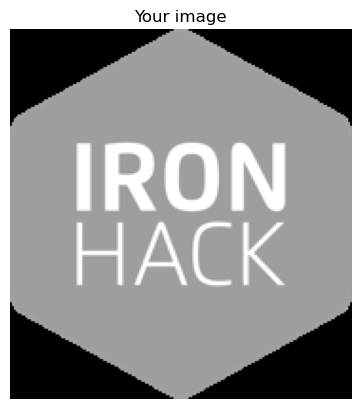

In [2]:
# Load your own image
image = cv2.imread('/Users/sebastianbrockschmidt/Desktop/ironhack labs/lab-opencv-scikit-image/image.png', 0) # 0 for grayscale

# Plotting it in a Euclidean space
plt.imshow(image, 'gray') # image, grayscale color
plt.title('Your image') # title
plt.axis('off') # removing the axis
plt.show()

<h3 style="color: #0099CC;">Challenge 2: Play with the Image</h3>

For some pre-processing techniques, having the image inverted helps to detect contorns. E.g: Hough transform.

For this challenge, try to invert the colors of the image, use StackOverFlow, Google and the libraries (OpenCV) to solve the challenge. - Avoid ChatGPT...

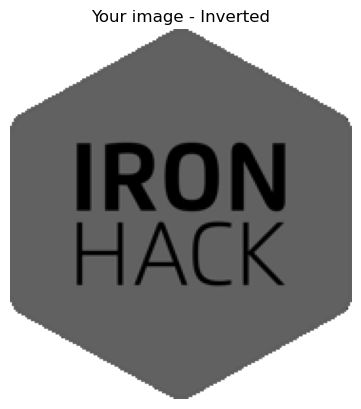

In [4]:
# Inverted images colors (dark background and bridge contorns make it easier for Hough transform)
# Your code to invert the image here:
inverted_image = cv2.bitwise_not(image)
# Showing the image
plt.imshow(inverted_image, 'gray') # image, grayscale color
plt.title('Your image - Inverted') # title
plt.axis('off') # removing the axis
plt.show()

<h3 style="color: #0099CC;">Challenge 3: Hough transform</h3>

Hough Transform is an image processing technique used to detect features of a particular shape within an image, specially to detect lines, circle and other parametric shapes.

In [5]:
from skimage.transform import hough_line, hough_line_peaks # Hough transform

In [6]:
# Classic straight-line Hough transform
# You can increase/decrease  the number of points if needed. 
tested_angles = np.linspace(-np.pi / 2, np.pi / 53, 800, endpoint=False)

Adapt the code below to apply Hough Transform to your image:
* Hint: Use hough_line imported function

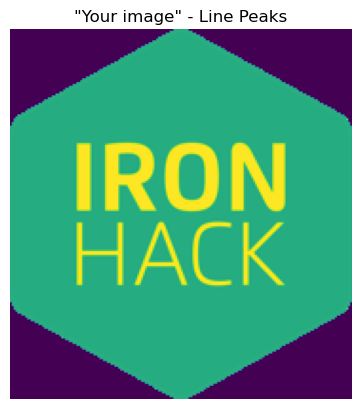

In [7]:
# Perform Hough Transformation to change x, y, to h, theta, dist space.

plt.imshow(image) # image, grayscale color
plt.title('"Your image" - Line Peaks') # title
plt.axis('off') # removing the axis
plt.show()

<h3 style="color: #0099CC;">Challenge 4: Pixel matrix</h3>

In [8]:
import sys # system parameters
np.set_printoptions(threshold=sys.maxsize) # ⚙️ to display all rows in a numpy array

Images are numbers.**Which** library do we use to manipulate numbers?

In [9]:
# Convert the image to a pixel matrix
# Your code below, convert the image to an array of numbers
pixel_matrix = np.array(image)

# Display the pixel matrix
print(pixel_matrix)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0 158 160 159 159
  159 160 159 157   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0

<h3 style="color: #0099CC;">Challenge 5: Rescaling the image</h3>

* Reescaling allow us to change the size of an image while maintening its aspect ratio.
* Useful to ensure that all images for testing and training have the same dimensions.
* Using rescale function from scikit-image, rescale the image to 20%:

In [ ]:
img_rescaled = rescale(image, 1.0 / 3.0, anti_aliasing=False) # ⚙️ play with the settings

# Showing the image
plt.imshow(img_rescaled, 'gray') # image, grayscale color
plt.title('"Your title" - Rescaled') # title
plt.axis('off') # removing the axis
plt.show()

<h3 style="color: #0099CC;">Challenge 6: Resize the image</h3>

* It's used to normalize the size of images in a dataset.
* Play with the settings

In [ ]:
img_resized = resize(image, (200, 200), # ⚙️ play with the settings
                     anti_aliasing = True)

# Showing the image
plt.imshow(img_resized, 'gray') # image, grayscale color
plt.title('"Your title" - Resized') # title
plt.axis('off') # removing the axis
plt.show()

<h3 style="color: #0099CC;">Challenge 7: Downscale the image</h3>

* Downscaling is odd, similar to reescaling; the dimensions of the image are reduced, but it can also lead to quality lost.
* It's usually followed by upscaling to retain important details from an image.
* Play with the settings

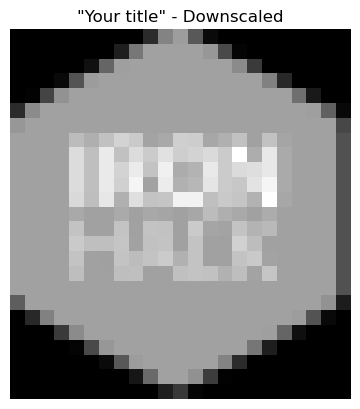

In [10]:
img_downscaled = downscale_local_mean(image, (8, 8)) # ⚙️ play with the settings

# Showing the image
plt.imshow(img_downscaled, 'gray') # image, grayscale color
plt.title('"Your title" - Downscaled') # title
plt.axis('off') # removing the axis
plt.show()

<h3 style="color: #0099CC;">Challenge 8: Morphological Transformations</h3>

Using scikit-image, we are gonna use canny edges and Hough transform to detect the circles:

The straight line is normally paramaterized as: y = mx + b,

Where **m** is the slope and **b** is the intercept.

NOTE: **m** goes to infinity for vertical lines

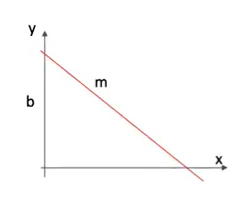

This line can also be represented as:

r = r cos 0 + y sin 0

Where **r** is the distance from the origin to the closest point on the straight line. (r, 0) corresponds to the Hough space representation of a line.

**Play with the settings to make it work:**

In [11]:
# Load picture and detect edges
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)

In [12]:
# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

In [13]:
# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

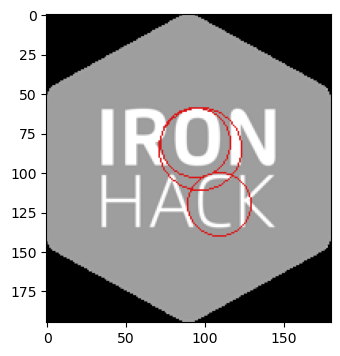

In [14]:
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

<h3 style="color: #0099CC;">Challenge 9: Image Pre-processing</h3>

Have fun, explore scikit-image library and test one of their examples:
- https://scikit-image.org/docs/stable/auto_examples/index.html